In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('C:/Users/keteb/OneDrive/Bureau/github/Portfolio_clusturing/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.dropna() 

df_cleaned = df_cleaned.transpose() 


In [80]:
df_cleaned.max().max()
df_cleaned.min().min()
df_cleaned

ticker,AA,ABM,ABT,ADI,ADM,ADX,AEE,AEG,AEM,AEP,...,XLI,XLK,XLP,XLU,XLV,XLY,XOM,XRX,YUM,ZTR
03/01/2000,-0.013042,-0.009188,-0.007117,-0.036071,0.000000,-0.001867,-0.007707,0.014739,-0.008658,-0.017734,...,-0.021967,-0.003376,-0.016349,-0.017490,-0.022942,-0.028632,-0.016647,0.034169,-0.032952,0.000000
04/01/2000,0.010043,0.012346,-0.012786,-0.044261,0.005277,-0.005666,0.000000,-0.018361,0.018019,0.013848,...,-0.014930,-0.025793,-0.009145,-0.031198,-0.019337,-0.015915,-0.007296,-0.047628,-0.011895,0.018868
05/01/2000,0.047628,-0.006192,0.011111,0.014493,-0.015915,0.000000,0.037955,-0.012089,-0.017858,0.036648,...,-0.002794,0.001810,0.010471,0.002866,-0.014799,-0.016645,0.037740,0.021506,0.000000,0.009479
06/01/2000,-0.011713,0.000000,0.032553,-0.027719,0.010695,0.005742,-0.003731,-0.003409,0.026907,0.013270,...,0.013341,-0.022196,0.011656,0.000000,0.004255,0.004829,0.052842,0.007926,-0.001714,0.009390
07/01/2000,-0.016118,0.003091,0.028573,0.033654,0.005249,0.003810,0.012975,0.000667,0.026202,0.007463,...,0.025864,0.027331,0.043898,0.006845,0.011073,0.035384,-0.011705,0.023408,-0.022551,0.009217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/12/2020,-0.017156,-0.011338,0.008434,0.002495,0.000607,-0.000584,0.008141,0.000000,0.012527,0.007149,...,-0.001363,0.004893,0.004205,0.004913,0.002425,0.001141,-0.001201,-0.014509,0.002980,0.003446
28/12/2020,0.006315,0.009932,-0.010796,-0.011887,-0.002010,0.004078,0.001565,-0.005128,-0.027193,-0.005643,...,-0.005320,0.001380,0.004172,-0.000813,-0.002681,0.001630,0.001199,0.020396,0.011820,0.005705
29/12/2020,-0.004527,-0.024098,-0.001568,-0.010525,-0.008056,-0.004066,-0.003650,-0.012772,0.004506,-0.003320,...,-0.011128,-0.010187,-0.005503,-0.002600,0.000089,-0.003188,-0.018486,-0.019023,-0.001643,0.000000
30/12/2020,0.039099,-0.002646,-0.002303,0.010522,0.009259,0.001745,0.004819,0.000000,0.005840,0.005659,...,0.004663,-0.003997,-0.002237,0.004380,-0.002224,0.002430,0.006512,0.010099,0.001462,-0.002275


In [81]:
(df_cleaned.tail(253).mean() > df_cleaned.head(251).mean()).value_counts()
457/663 * 100

68.92911010558069

In [82]:
rolling_mean = df.transpose().rolling(window=20).mean()

In [83]:
rolling_mean.shape

(5279, 695)

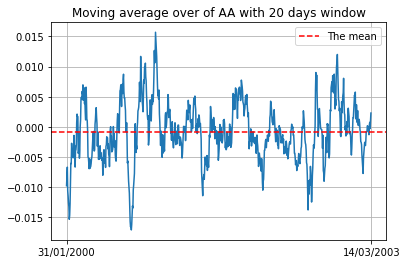

In [84]:
plt.plot(rolling_mean['AA'][19:800])
plt.title('Moving average over of AA with 20 days window')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_mean['AA'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.grid()
plt.legend()
plt.show()


- La tendance à long terme n'est pas visible, la série temporel semble être volatile on peut faire la standard error mobile pour voir l'écartement autour de cette moyenne mobile 
- En moyenne le return vaut 0 

In [85]:
rolling_std = df.transpose().rolling(window=20).std()

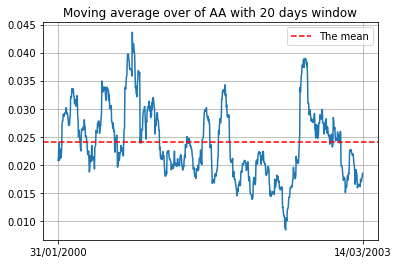

In [86]:
plt.plot(rolling_std['AA'][19:800])
plt.title('Moving average over of AA with 20 days window')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_std['AA'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.grid()
plt.legend()
plt.show()

- Afin de meiux visualiser les données on peut faire une ACP pour voir la dispersion des actifs entre eux.

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [88]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.T)

In [89]:
pca = PCA(n_components=2)  # Vous pouvez ajuster le nombre de composantes principales en fonction de vos besoins
composantes_principales = pca.fit_transform(scaled_data)

In [90]:
df_composantes_principales = pd.DataFrame(data=composantes_principales, columns=['PC1', 'PC2'])

In [91]:
print(df_composantes_principales.shape)

(663, 2)


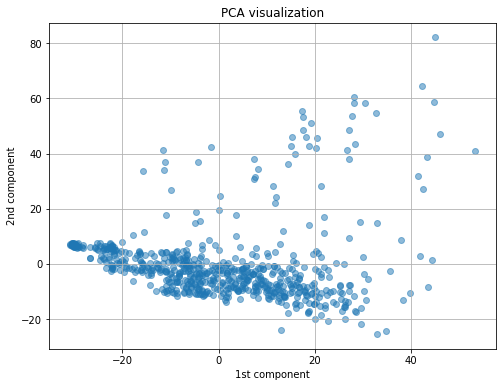

In [92]:
plt.figure(figsize=(8, 6))
plt.scatter(df_composantes_principales['PC1'], df_composantes_principales['PC2'], alpha=0.5)
plt.title('PCA visualization')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.grid(True)
plt.show()

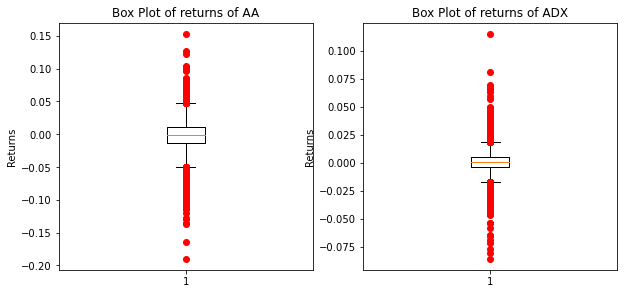

In [93]:
plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.boxplot(df_cleaned['AA'] , sym='ro')
plt.title('Box Plot of returns of AA')
plt.ylabel('Returns')

plt.subplot(2, 2, 2)
plt.boxplot(df_cleaned['ADX'] , sym='ro')
plt.title('Box Plot of returns of ADX')
plt.ylabel('Returns')




plt.show()

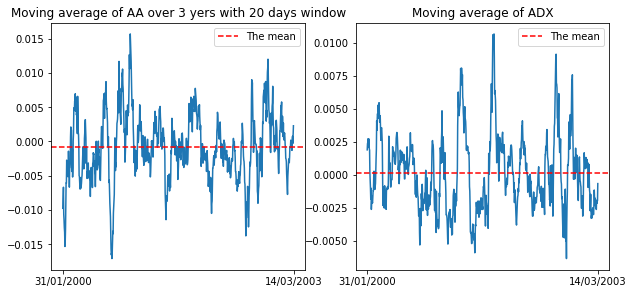

In [94]:
plt.figure(figsize=(10, 10))



plt.subplot(2, 2, 1)
plt.plot(rolling_mean['AA'][19:800])
plt.title('Moving average of AA over 3 yers with 20 days window')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_mean['AA'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(rolling_mean['ADX'][19:800])
plt.title('Moving average of ADX')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_mean['ADX'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.legend()




plt.legend()
plt.show()

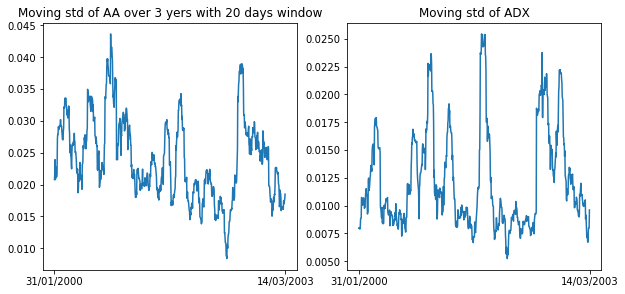

In [95]:
plt.figure(figsize=(10, 10))



plt.subplot(2, 2, 1)
plt.plot(rolling_std['AA'][19:800])
plt.title('Moving std of AA over 3 yers with 20 days window')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])



plt.subplot(2, 2, 2)
plt.plot(rolling_std['ADX'][19:800])
plt.title('Moving std of ADX')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])





plt.show()

In [139]:
df_sub = df_cleaned.sample(20, axis=1, random_state= 42)
df_sub
df_sub.corr()

ticker,LNN,TKR,RY,MIN,HR,OFG,PCG,MHN,KSU,CCK,BTO,IDA,OMC,MFM,RNR,BHE,BAX,PHM,FLS,MGA
ticker,,,,,,,,,,,,,,,,,,,,
LNN,1.000000,0.326828,0.263786,0.019831,0.272773,0.244442,0.056111,0.077950,0.306939,0.178088,0.300182,0.207750,0.268914,0.038711,0.169136,0.233017,0.149932,0.259003,0.332541,0.295564
TKR,0.326828,1.000000,0.381923,0.055278,0.331876,0.302225,0.135014,0.110561,0.419194,0.248974,0.425471,0.252671,0.359167,0.094720,0.214817,0.359317,0.190373,0.351662,0.499456,0.404110
RY,0.263786,0.381923,1.000000,0.120522,0.363027,0.308375,0.146868,0.147396,0.378288,0.193313,0.514895,0.259938,0.356220,0.128446,0.274299,0.269609,0.227840,0.387595,0.379744,0.404265
MIN,0.019831,0.055278,0.120522,1.000000,0.058014,0.013653,0.036671,0.137741,0.049407,0.028128,0.076003,0.064108,0.044031,0.160323,0.048368,0.032286,0.022550,0.092930,0.037110,0.056661
HR,0.272773,0.331876,0.363027,0.058014,1.000000,0.322491,0.166378,0.140137,0.334601,0.218739,0.432167,0.376209,0.315198,0.140985,0.321570,0.300254,0.198978,0.391752,0.324361,0.318393
OFG,0.244442,0.302225,0.308375,0.013653,0.322491,1.000000,0.071206,0.038798,0.264928,0.152245,0.428768,0.201183,0.249610,0.079486,0.200271,0.292537,0.157331,0.292104,0.298651,0.283235
PCG,0.056111,0.135014,0.146868,0.036671,0.166378,0.071206,1.000000,0.083459,0.103655,0.100465,0.167693,0.337667,0.166527,0.043239,0.134690,0.125282,0.152841,0.134806,0.130890,0.129057
MHN,0.077950,0.110561,0.147396,0.137741,0.140137,0.038798,0.083459,1.000000,0.082707,0.027572,0.152439,0.088444,0.054640,0.361863,0.136243,0.059496,0.007359,0.107816,0.043565,0.104744
KSU,0.306939,0.419194,0.378288,0.049407,0.334601,0.264928,0.103655,0.082707,1.000000,0.234050,0.372907,0.265095,0.366198,0.068395,0.238484,0.327057,0.190111,0.371592,0.406492,0.383577


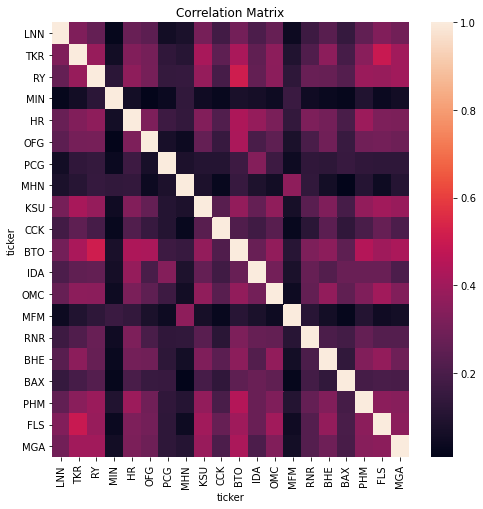

In [141]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_sub.corr())
plt.title('Correlation Matrix')
plt.show()